In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Resonant

1. 生成 SPANet embedding vector .h5 ，轉存進 .npy
2. 生成 對應的 high-level observable 的 .npy

In [2]:
X = np.load('../DNN-resonant/DNN_sample/SPANet_embedding/500k_diHiggs_4b_PT40_resonant_mix_class_test-embedding.npy', allow_pickle=True).item()
Xs = X['data'][X['label']==1]
Xb = X['data'][X['label']==0]
X = np.vstack([Xs, Xb])

Y = np.load('../DNN-resonant/DNN_sample/SPANet_high_level_test.npy', allow_pickle=True).item()
Ys = Y['data'][Y['label']==1]
Yb = Y['data'][Y['label']==0]
Y = np.vstack([Ys, Yb])

In [3]:
n_pca = 10
pca = PCA(n_components=n_pca)

newX = pca.fit_transform(X)

newXs = pca.transform(Xs)
newXb = pca.transform(Xb)

exp_var_pca = pca.explained_variance_ratio_

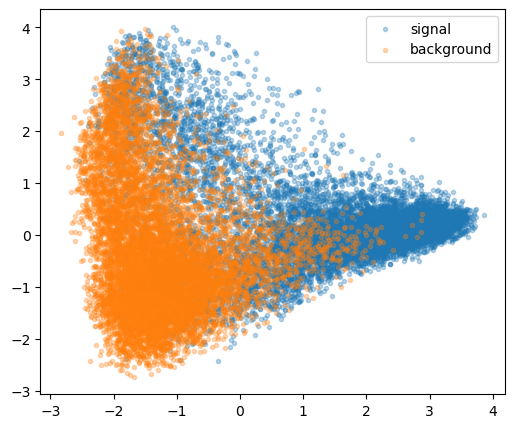

In [4]:
fig, ax = plt.subplots(1, 1, figsize =(6, 5))
n_event = 10000
ax.scatter(newXs[:,0][:n_event],newXs[:,1][:n_event], label='signal', marker='.', alpha=0.3)
ax.scatter(newXb[:,0][:n_event],newXb[:,1][:n_event], label='background', marker='.', alpha=0.3)

ax.legend()
plt.show()

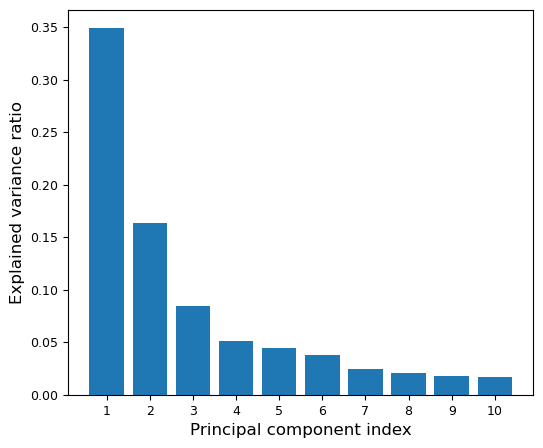

In [5]:
fig, ax = plt.subplots(1, 1, figsize =(6, 5))
ax.bar(np.arange(0,n_pca)+1,pca.explained_variance_ratio_)
# ax.plot(pca.explained_variance_ratio_, color='k', marker='.')

ax.set_xlabel('Principal component index', fontsize=12)
ax.set_ylabel('Explained variance ratio', fontsize=12)

ax.xaxis.set_ticks(np.arange(0,n_pca)+1)
ax.tick_params(axis='both', which='major', labelsize=9)

plt.savefig('figures/PCA_variance_ratio-resonant.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
n_pca = 3
pca_labels = [f'PC {x}' for x in range(1,1+n_pca)]

y_selection = [0,1,2,3,
               4,5,6,7,
               8,9,
               #    10,11,12,13,
               14,15,
               ]

y_labels = np.array(['$p_\mathrm{T1}$', '$\eta_1$', '$\phi_1$', '$m_1$', 
                     '$p_\mathrm{T2}$', '$\eta_2$', '$\phi_2$', '$m_2$',
                     '$\Delta R_1$', '$\Delta R_2$',
                     'BTag1', 'BTag2', 'BTag3', 'BTag4', 
                     '$p_\mathrm{T}^\mathrm{hh}$', '$m_\mathrm{hh}$',
                     ])[y_selection]
labels = []
labels.extend(pca_labels)
labels.extend(y_labels)

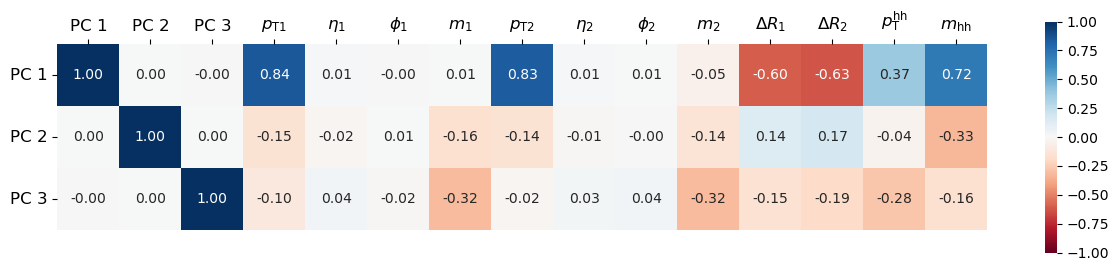

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))
corr = np.corrcoef(newX.transpose()[:n_pca], Y.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels, 
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=12)
plt.savefig('figures/correlation_coefficients_pca-resonant.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

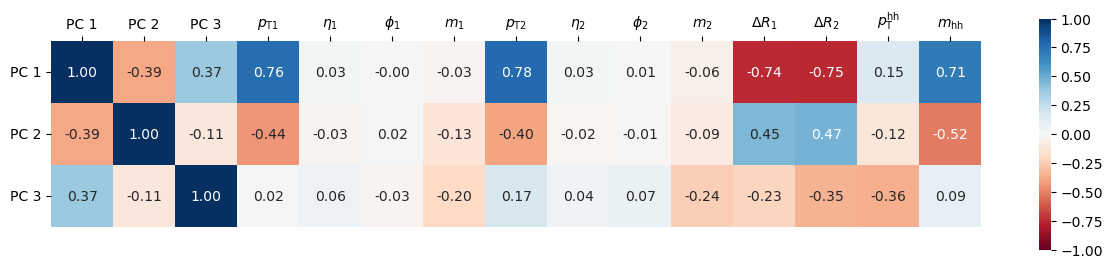

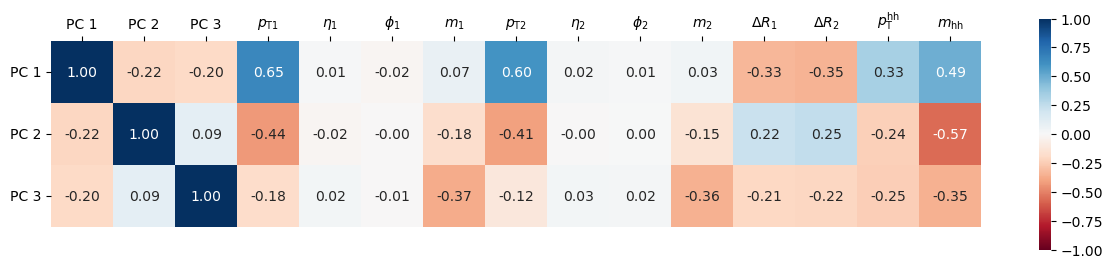

In [8]:
fig, ax = plt.subplots(figsize=(15, 3))
corr = np.corrcoef(newXs.transpose()[:n_pca], Ys.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels,
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.savefig('figures/correlation_coefficients_pca-resonant-signal.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(15, 3))
corr = np.corrcoef(newXb.transpose()[:n_pca], Yb.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels, 
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.savefig('figures/correlation_coefficients_pca-resonant-background.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

# Non-resonant

In [9]:
# 
Xs = np.load('../DNN/DNN_sample/SPANet_embedding/DNN_signal_mixing_train_v0-embedding.npy')
# Xb = np.load('../DNN/DNN_sample/SPANet_embedding/DNN_pp4b_mixing_train_v0-embedding.npy')
Xb = np.load('../Sample/h5_data/pp4b_mixing/DNN_pp4b_mixing_train_v0-embedding_cor.npy')
X = np.vstack([Xs,Xb])

In [10]:
Ys = np.load('../DNN/DNN_sample/DNN_signal_mixing_train_mix-class-SPANET2.npy')
Yb = np.load('../DNN/DNN_sample/DNN_pp4b_mixing_train_mix-class-SPANET2.npy')
Y = np.vstack([Ys,Yb])

In [11]:
n_pca = 10
pca = PCA(n_components=n_pca)

newX = pca.fit_transform(X)

newXs = pca.transform(Xs)
newXb = pca.transform(Xb)

exp_var_pca = pca.explained_variance_ratio_

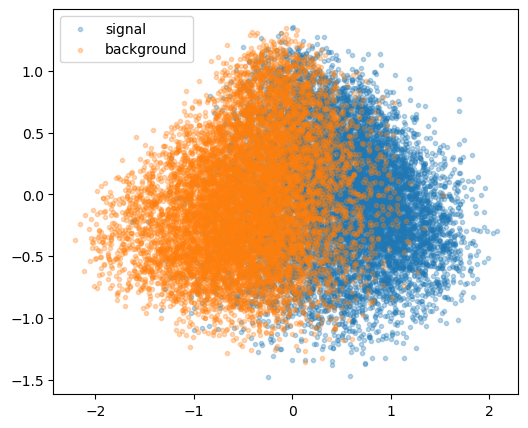

In [12]:
fig, ax = plt.subplots(1, 1, figsize =(6, 5))
n_event = 10000
ax.scatter(newXs[:,0][:n_event],newXs[:,1][:n_event], label='signal', marker='.', alpha=0.3)
ax.scatter(newXb[:,0][:n_event],newXb[:,1][:n_event], label='background', marker='.', alpha=0.3)

ax.legend()
plt.show()

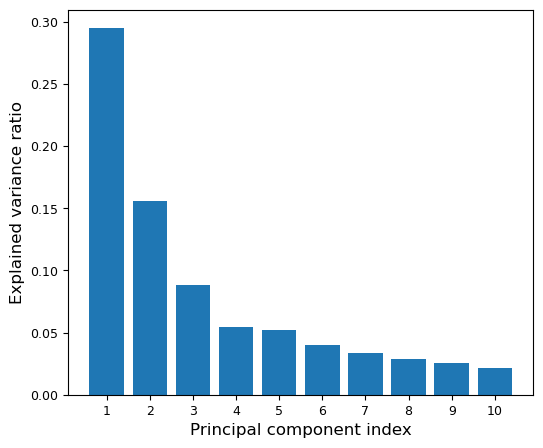

In [13]:
fig, ax = plt.subplots(1, 1, figsize =(6, 5))
ax.bar(np.arange(0,n_pca)+1,pca.explained_variance_ratio_)
# ax.plot(pca.explained_variance_ratio_, color='k', marker='.')

ax.set_xlabel('Principal component index', fontsize=12)
ax.set_ylabel('Explained variance ratio', fontsize=12)

ax.xaxis.set_ticks(np.arange(0,n_pca)+1)
ax.tick_params(axis='both', which='major', labelsize=9)

plt.savefig('figures/PCA_variance_ratio-nonresonant.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

# Correlation coefficients of Principal components and High level observables

In [14]:
n_pca = 3
pca_labels = [f'PC {x}' for x in range(1,1+n_pca)]

y_selection = [0,1,2,3,
               4,5,6,7,
               8,9,
               10,11,
#                12,13,
#                14,15,16,17,
               18,19,
               20]

y_labels = np.array(['$p_\mathrm{T1}$', '$\eta_1$', '$\phi_1$', '$m_1$', 
                     '$p_\mathrm{T2}$', '$\eta_2$', '$\phi_2$', '$m_2$',
                     '$\Delta R_1$', '$\Delta R_2$',
                     '$E_\mathrm{T}^\mathrm{miss}$', '$\phi_\mathrm{T}^\mathrm{miss}$',
                     'N_e', 'N_mu',
                     'BTag1', 'BTag2', 'BTag3', 'BTag4', 
                     '$p_\mathrm{T}^\mathrm{hh}$', '$m_\mathrm{hh}$',
                     '$\kappa$',
                     ])[y_selection]
labels = []
labels.extend(pca_labels)
labels.extend(y_labels)

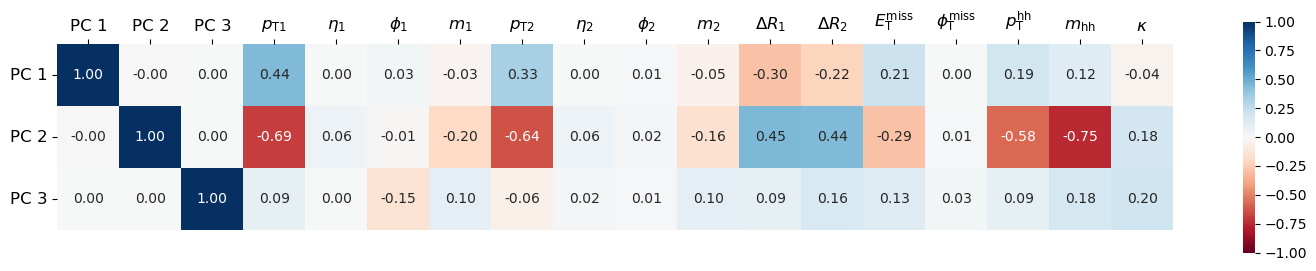

In [15]:
fig, ax = plt.subplots(figsize=(18, 3))
corr = np.corrcoef(newX.transpose()[:n_pca], Y.transpose()[y_selection])
sns.heatmap(corr[:n_pca,:], annot=True, 
            xticklabels=labels, 
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=12)
plt.savefig('figures/correlation_coefficients_pca-nonresonant.pdf',facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

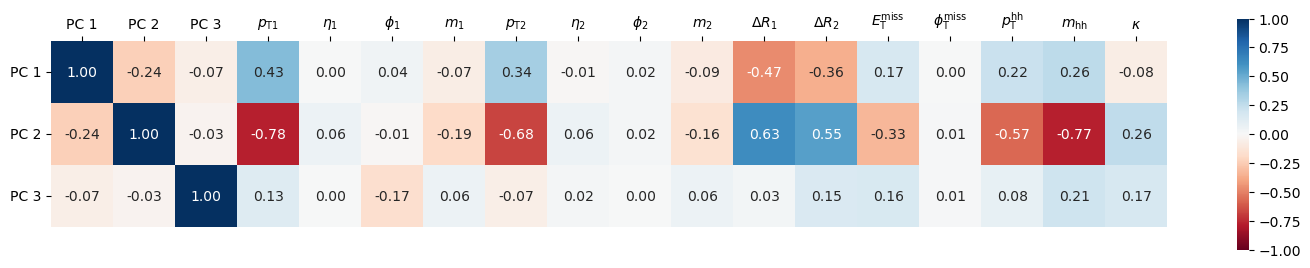

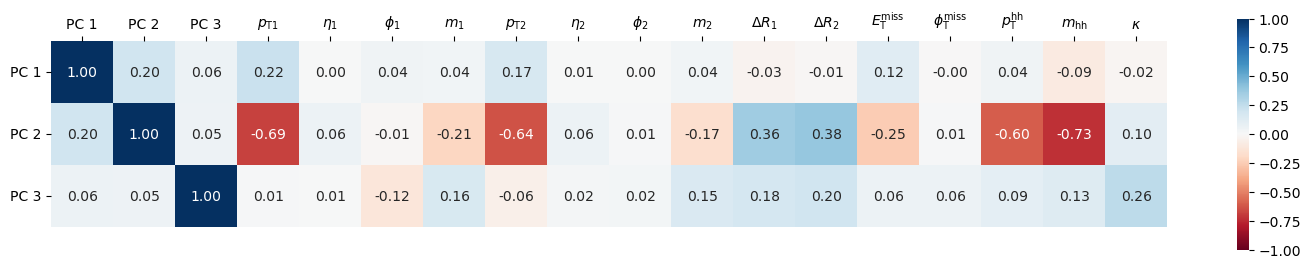

In [16]:
fig, ax = plt.subplots(figsize=(18, 3))
corr_s = np.corrcoef(newXs.transpose()[:n_pca], Ys.transpose()[y_selection])
sns.heatmap(corr_s[:n_pca,:], annot=True, 
            xticklabels=labels,
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.savefig('figures/correlation_coefficients_pca-nonresonant-signal.pdf',facecolor='White', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(18, 3))
corr_b = np.corrcoef(newXb.transpose()[:n_pca], Yb.transpose()[y_selection])
sns.heatmap(corr_b[:n_pca,:], annot=True, 
            xticklabels=labels, 
            yticklabels=pca_labels,
            cmap='RdBu',
            fmt = '.2f', square=True,
            vmin=-1, vmax=1,
            ax=ax)
ax.xaxis.tick_top() # x axis on top
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.savefig('figures/correlation_coefficients_pca-nonresonant-background.pdf',facecolor='White', dpi=300, bbox_inches='tight')
plt.show()